In [1]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(danishlc)
danishlc

Cases,Pop,Age,City
11,3059,40-54,Fredericia
11,800,55-59,Fredericia
11,710,60-64,Fredericia
10,581,65-69,Fredericia
11,509,70-74,Fredericia
10,605,>74,Fredericia
13,2879,40-54,Horsens
6,1083,55-59,Horsens
15,923,60-64,Horsens
10,834,65-69,Horsens


In [3]:
danishlc$Rate <- danishlc$Cases / danishlc$Pop * 1000 # Rate per 1000
danishlc$Age <- ordered(danishlc$Age, # Ensure age-order is preserved
levels=c("40-54", "55-59", "60-64", "65-69", "70-74", ">74") )

In [4]:
danishlc$City <- abbreviate(danishlc$City, 1)

In [5]:
danishlc

Cases,Pop,Age,City,Rate
11,3059,40-54,F,3.595946
11,800,55-59,F,13.750000
11,710,60-64,F,15.492958
10,581,65-69,F,17.211704
11,509,70-74,F,21.611002
10,605,>74,F,16.528926
13,2879,40-54,H,4.515457
6,1083,55-59,H,5.540166
15,923,60-64,H,16.251354
10,834,65-69,H,11.990408


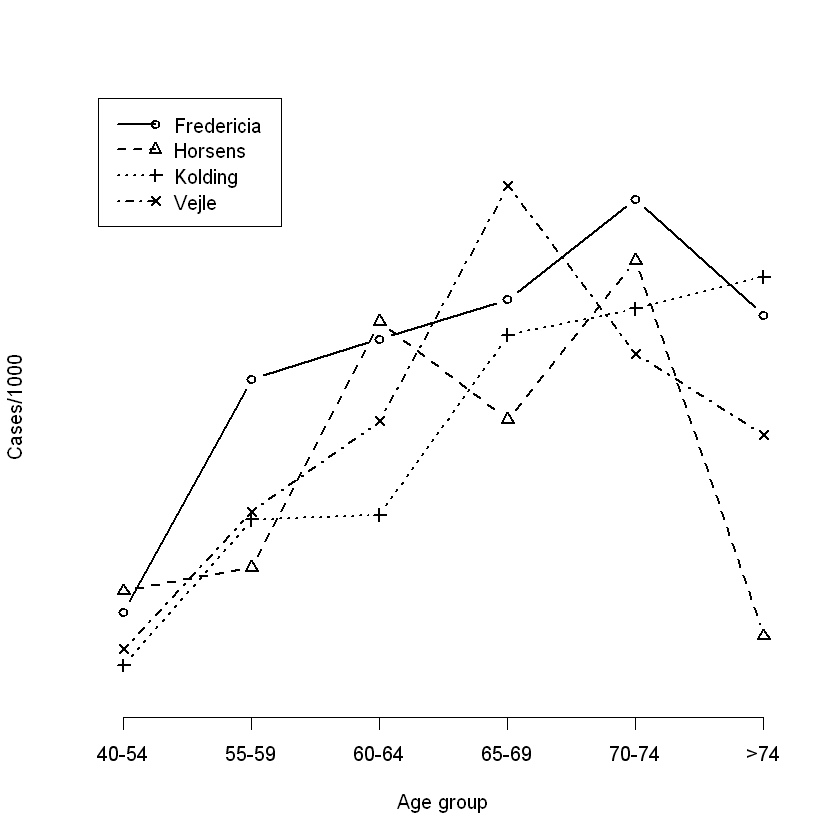

In [6]:
matplot( xtabs( Rate ~ Age+City, data=danishlc), pch=1:4, lty=1:4,
type="b", lwd=2, col="black", axes=FALSE, ylim=c(0, 25),
xlab="Age group", ylab="Cases/1000")
axis(side=1, at=1:6, labels=levels(danishlc$Age))
axis(side=1, at=1:6, labels=levels(danishlc$Age))
legend("topleft", col="black", pch=1:4, lwd=2, lty=1:4, merge=FALSE,
legend=c("Fredericia", "Horsens", "Kolding", "Vejle") )

In [7]:
dlc.m1 <- glm( Cases ~ offset( log(Pop) ) + City * Age,
family=poisson, data=danishlc)
anova(dlc.m1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,23,1.299079e+02,NA
City,3,3.392657,20,1.265153e+02,3.349533e-01
Age,5,103.067815,15,2.344748e+01,1.191764e-20
City:Age,15,23.447478,0,1.332268e-15,7.509017e-02


In [8]:
dlc.m2 <- update(dlc.m1, . ~ offset(log(Pop)) + Age )

In [9]:
danishlc$AgeNum <- rep( c(40, 55, 60, 65, 70, 75), 4)
dlc.m3 <- update(dlc.m1, . ~ offset( log(Pop) ) + AgeNum)
dlc.m4 <- update( dlc.m3, . ~ offset( log(Pop) ) + poly(AgeNum, 2) )

In [10]:
anova( dlc.m3, dlc.m4, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
22,48.96752,NA,NA,NA
21,32.49959,1,16.46793,4.948007e-05


In [11]:
c( "With interaction"=AIC(dlc.m1), "Without interaction"=AIC(dlc.m2),
"Age (numerical)"=AIC(dlc.m3), "Age (numerical; quadratic)"=AIC(dlc.m4) )

With interaction        Without interaction 
                  144.3880                   136.6946 
           Age (numerical) Age (numerical; quadratic) 
                  149.3556                   134.8876

In [12]:
D.m2 <- deviance(dlc.m2); df.m2 <- df.residual( dlc.m2 )
c( Dev=D.m2, df=df.m2, P = pchisq( D.m2, df.m2, lower.tail = FALSE) )

Dev          df           P 
28.30652745 18.00000000  0.05754114

In [13]:
D.m4 <- deviance(dlc.m4); df.m4 <- df.residual( dlc.m4 )
c( Dev=D.m4, df=df.m4, P=pchisq( D.m4, df.m4, lower = FALSE) )

Dev          df           P 
32.49959158 21.00000000  0.05206888

In [14]:
c( "With interaction"=AIC(dlc.m1), "Without interaction"=AIC(dlc.m2),
"Age (numerical)"=AIC(dlc.m3), "Age (numerical; quadratic)"=AIC(dlc.m4) )

With interaction        Without interaction 
                  144.3880                   136.6946 
           Age (numerical) Age (numerical; quadratic) 
                  149.3556                   134.8876

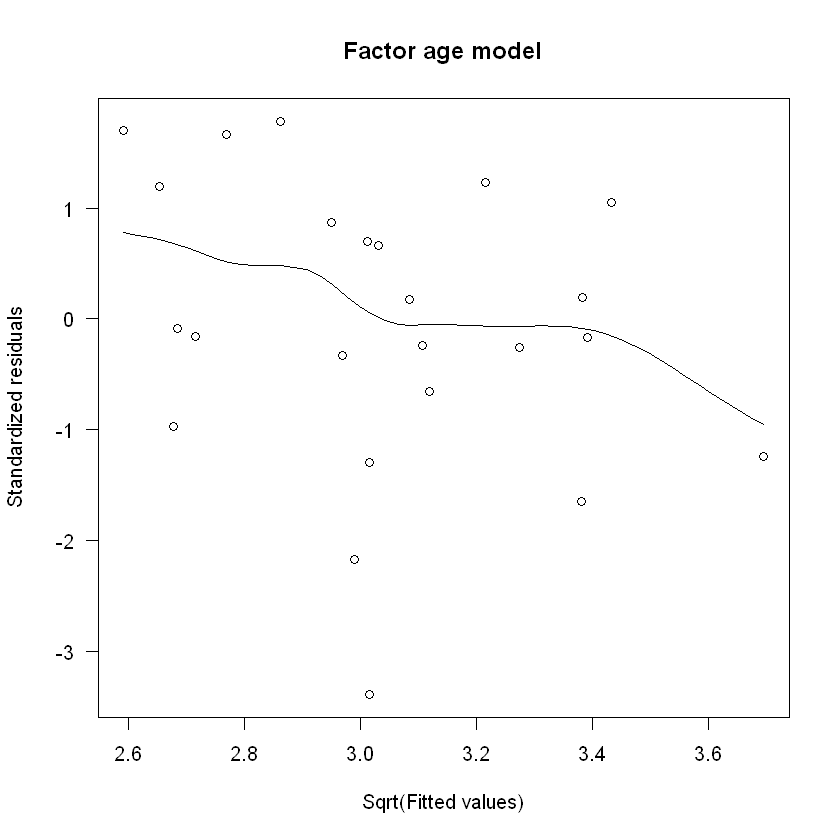

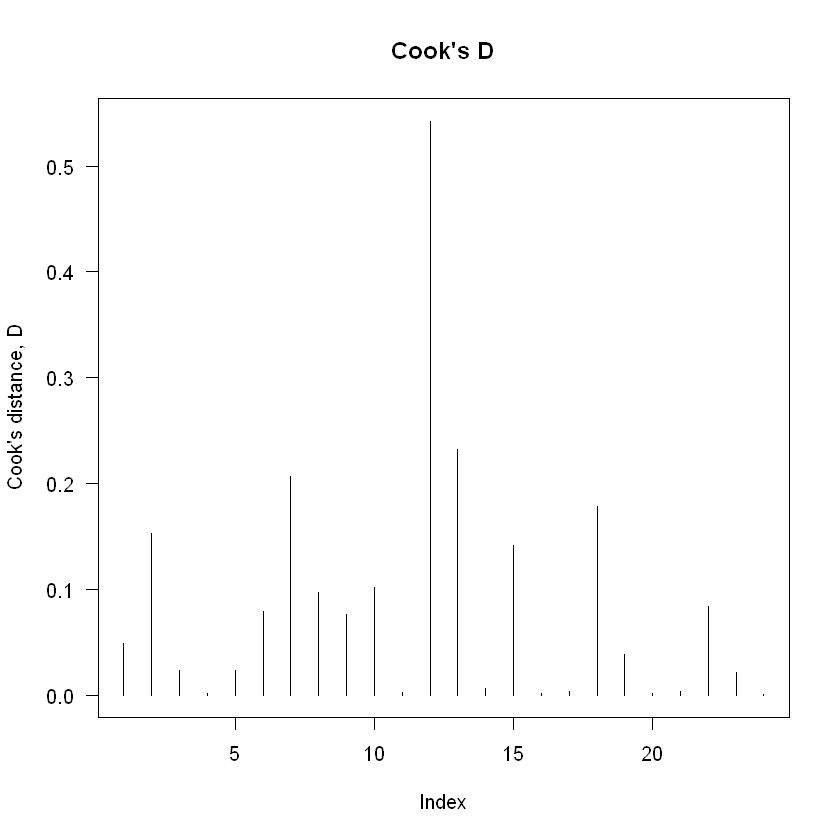

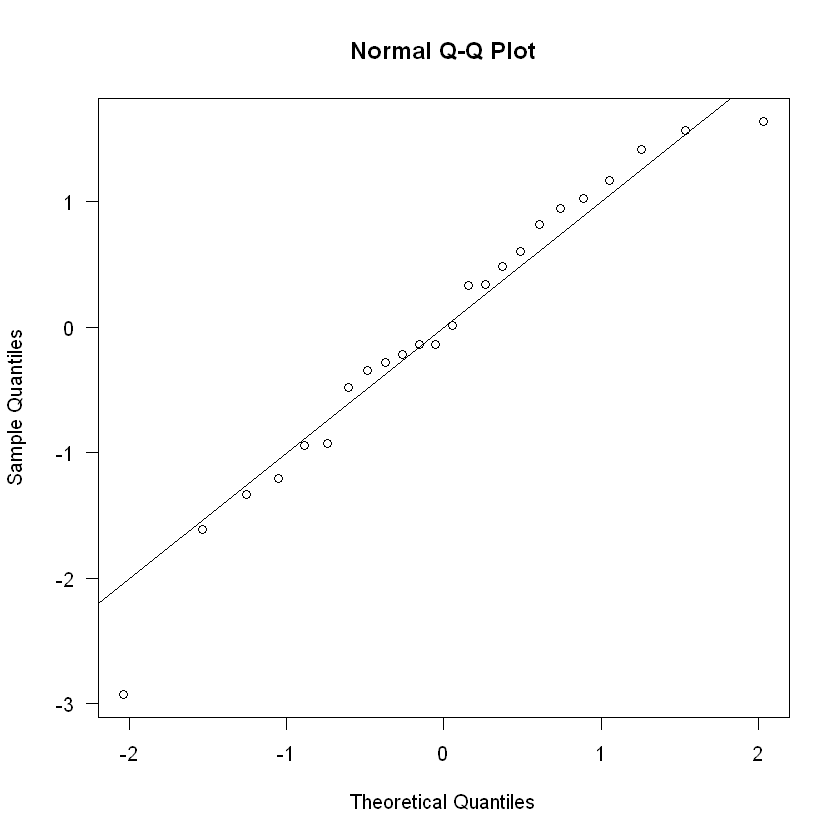

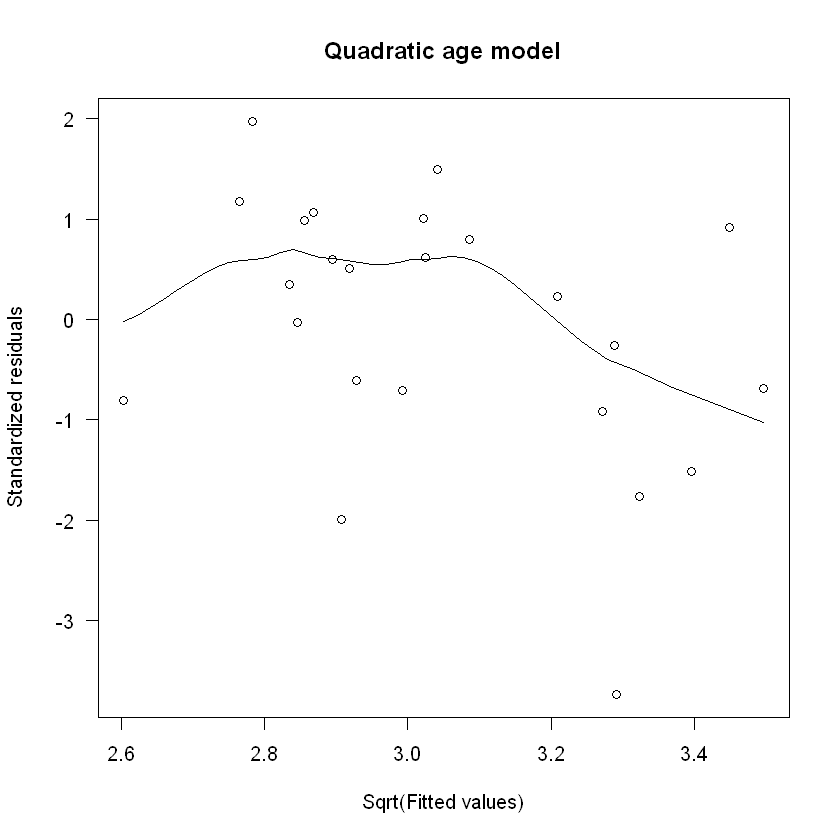

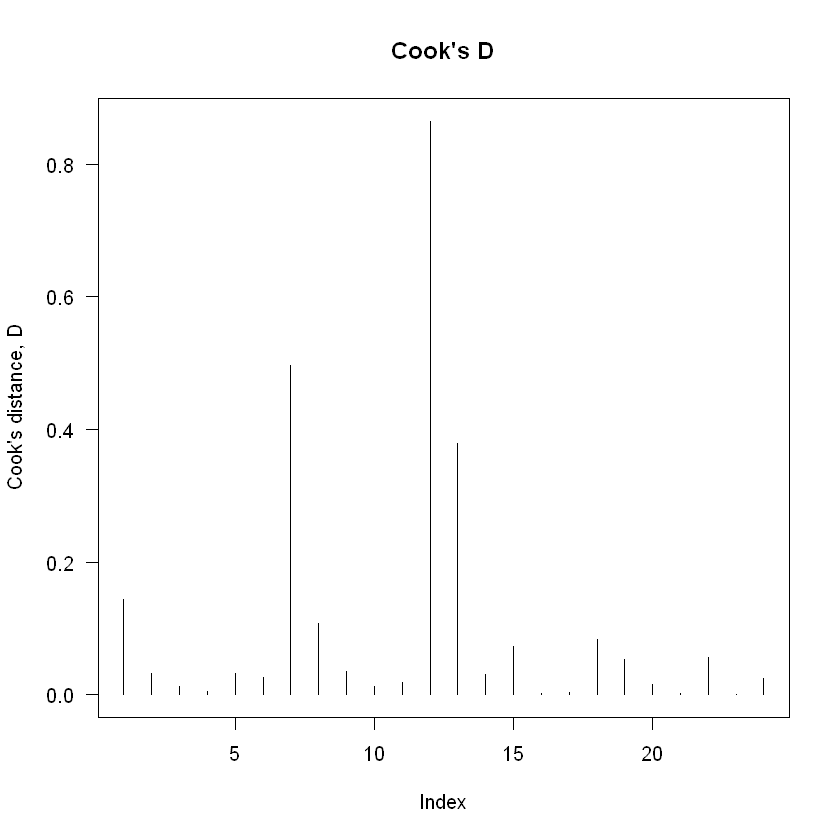

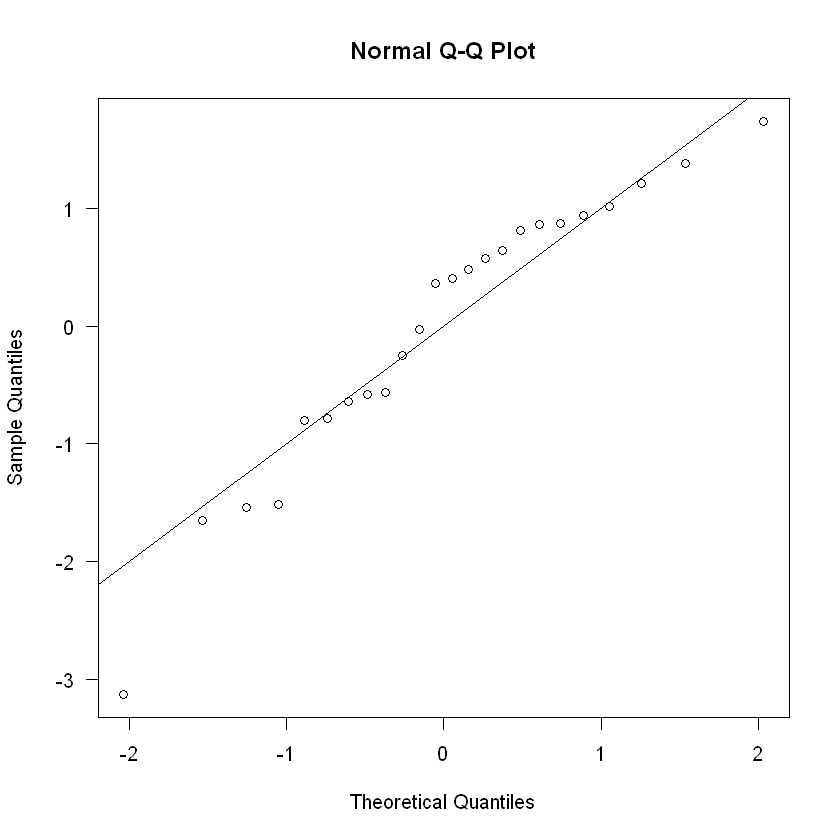

In [15]:

scatter.smooth( rstandard(dlc.m2) ~ sqrt(fitted(dlc.m2)),
ylab="Standardized residuals", xlab="Sqrt(Fitted values)",
main="Factor age model", las=1 )
plot( cooks.distance(dlc.m2), type="h", las=1, main="Cook's D",
ylab="Cook's distance, D")
qqnorm( qr<-qresid(dlc.m2), las=1 ); abline(0, 1)
scatter.smooth( rstandard(dlc.m4) ~ sqrt(fitted(dlc.m4)),
ylab="Standardized residuals", xlab="Sqrt(Fitted values)",
main="Quadratic age model", las=1 )
plot( cooks.distance(dlc.m4), type="h", las=1, main="Cook's D",
ylab="Cook's distance, D")
qqnorm( qr<-qresid(dlc.m4), las=1 ); abline(0, 1)

In [16]:
Counts <- c(263, 258, 151, 222)
Att <- gl(2, 2, 4, labels=c("For", "Against") )
Inc <- gl(2, 1, 4, labels=c("High", "Low") )
data.frame( Counts, Att, Inc)

Counts,Att,Inc
263,For,High
258,For,Low
151,Against,High
222,Against,Low


In [17]:
 gm.table <- xtabs( Counts ~ Att + Inc ); gm.table

         Inc
Att       High Low
  For      263 258
  Against  151 222

In [18]:
gm.1 <- glm( Counts ~ Att + Inc, family=poisson)
anova( gm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,3,38.25983,NA
Att,1,24.614277,2,13.64555,7.003095e-07
Inc,1,4.876919,1,8.76863,2.721816e-02


In [19]:
coef( gm.1 )

(Intercept)  AttAgainst      IncLow 
  5.4859102  -0.3341716   0.1479201

In [20]:
data(kstones)

In [21]:
str(kstones)

'data.frame':	8 obs. of  4 variables:
 $ Counts : int  81 6 234 36 192 71 55 25
 $ Size   : Factor w/ 2 levels "Large","Small": 2 2 2 2 1 1 1 1
 $ Method : Factor w/ 2 levels "A","B": 1 1 2 2 1 1 2 2
 $ Outcome: Factor w/ 2 levels "Failure","Success": 2 1 2 1 2 1 2 1


In [22]:
ks.mutind <- glm( Counts ~ Size + Method + Outcome,
family=poisson, data=kstones)

In [23]:
coef(summary(ks.mutind))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),3.520757e+00,0.10080589,3.492610e+01,2.986681e-267
SizeSmall,4.000533e-02,0.07560802,5.291150e-01,5.967257e-01
MethodB,-1.121380e-15,0.07559289,-1.483447e-14,1.000000e+00
OutcomeSuccess,1.404248e+00,0.09500387,1.478096e+01,1.943834e-49


In [24]:
anova(ks.mutind, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7,510.1404,NA
Size,1,2.800187e-01,6,509.8604,5.966890e-01
Method,1,5.684342e-14,5,509.8604,9.999998e-01
Outcome,1,2.754237e+02,4,234.4367,7.462502e-62


In [26]:
ks.SM <- glm( Counts ~ Size * Method + Outcome,
family=poisson, data=kstones )
ks.SO <- update(ks.SM, . ~ Size * Outcome + Method)
ks.OM <- update(ks.SM, . ~ Outcome * Method + Size)

In [27]:
ks.noMO <- glm( Counts ~ Size * (Method + Outcome),
family=poisson, data=kstones )
ks.noOS <- update(ks.noMO, . ~ Method * (Outcome + Size) )
ks.noMS <- update(ks.noMO, . ~ Outcome * (Method + Size) )

In [31]:
coef(summary(ks.noMO))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),4.2987718,0.1063179,40.433189,0.000000e+00
SizeSmall,-1.9729298,0.2092992,-9.426362,4.245606e-21
MethodB,-1.1901274,0.1276804,-9.321145,1.150916e-20
OutcomeSuccess,0.9450401,0.1202716,7.857552,3.917119e-15
SizeSmall:MethodB,2.3226412,0.1774831,13.086551,3.930518e-39
SizeSmall:OutcomeSuccess,1.0698629,0.2035912,5.254957,1.480594e-07


In [28]:
ks.no3 <- glm( Counts ~ Size*Method*Outcome - Size:Method:Outcome,
family=poisson, data=kstones )

In [29]:
ks.all <- glm( Counts ~ Size * Method * Outcome,
family=poisson, data=kstones )

In [30]:
deviance(ks.all); df.residual(ks.all)

[1] 1.709743e-14

[1] 0

In [32]:
ks.tab <- xtabs(Counts ~ Method + Outcome + Size, data=kstones)

In [33]:
MO.tab <- apply( ks.tab, c(1, 2), sum) # Sums over the 3rd dimension

In [34]:
prop.table(MO.tab, 1)

,Failure,Success
A,0.2200000,0.7800000
B,0.1742857,0.8257143


In [35]:
y <- ifelse(Att == "Against", 1, 0)
gm.bin <- glm(y~Inc, family=binomial, weights=Counts)
anova(gm.bin, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,3,1214.733,NA
Inc,1,8.76863,2,1205.964,0.003064555


In [36]:
coef(summary(gm.bin))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.5548742,0.1021018,-5.434518,5.494476e-08
IncLow,0.4045920,0.1371323,2.950378,3.173854e-03


In [38]:
deviance(gm.bin)

[1] 1205.964

In [40]:
y <- ifelse(kstones$Outcome=="Success", 1, 0)
ks.bin <- glm(y~Size*Method, family=binomial,
weights=Counts, data=kstones)
anova(ks.bin, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,7,694.9824,NA
Size,1,29.673639,6,665.3087,5.112535e-08
Method,1,2.442145,5,662.8666,1.181146e-01
Size:Method,1,1.008164,4,661.8584,3.153430e-01


In [41]:
data(dyouth)
dy.m1 <- glm( Obs ~ Age*Depression*Gender + Age*Group,
data=dyouth, family=poisson)
anova(dy.m1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,23,368.04836,NA
Age,2,11.962892,21,356.08547,2.525172e-03
Depression,1,168.375063,20,187.71040,1.675246e-38
Gender,1,58.369397,19,129.34101,2.172442e-14
Group,1,69.103522,18,60.23748,9.342836e-17
Age:Depression,2,3.616211,16,56.62127,1.639645e-01
Age:Gender,2,3.631477,14,52.98980,1.627177e-01
Depression:Gender,1,7.228660,13,45.76114,7.174874e-03
Age:Group,2,27.089590,11,18.67155,1.310902e-06
Age:Depression:Gender,2,8.324629,9,10.34692,1.557147e-02


In [43]:
deviance(dy.m1)
p.value <- pchisq(deviance(dy.m1), df=df.residual(dy.m1), lower.tail = FALSE)
p.value

[1] 10.34692

[1] 0.3231371

In [46]:
data(wacancer)
str(wacancer)
wc.poor <- glm( Counts ~ factor(Cancer)*factor(Gender), data=wacancer, family=poisson )
anova( wc.poor, test="Chisq")

'data.frame':	14 obs. of  3 variables:
 $ Cancer: Factor w/ 7 levels "Breast","Cervix",..: 7 1 3 4 5 2 6 7 1 3 ...
 $ Gender: Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 1 1 1 ...
 $ Counts: int  923 0 511 472 362 0 1406 0 875 355 ...


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,13,6.063678e+03,NA
factor(Cancer),6,3281.52408,7,2.782154e+03,0.000000e+00
factor(Gender),1,95.91194,6,2.686242e+03,1.201088e-22
factor(Cancer):factor(Gender),6,2686.24156,0,4.552310e-10,0.000000e+00


In [ ]:
c(Df=df.residual(m1), Resid.Dev=deviance(m1), Pearson.X2=X2)

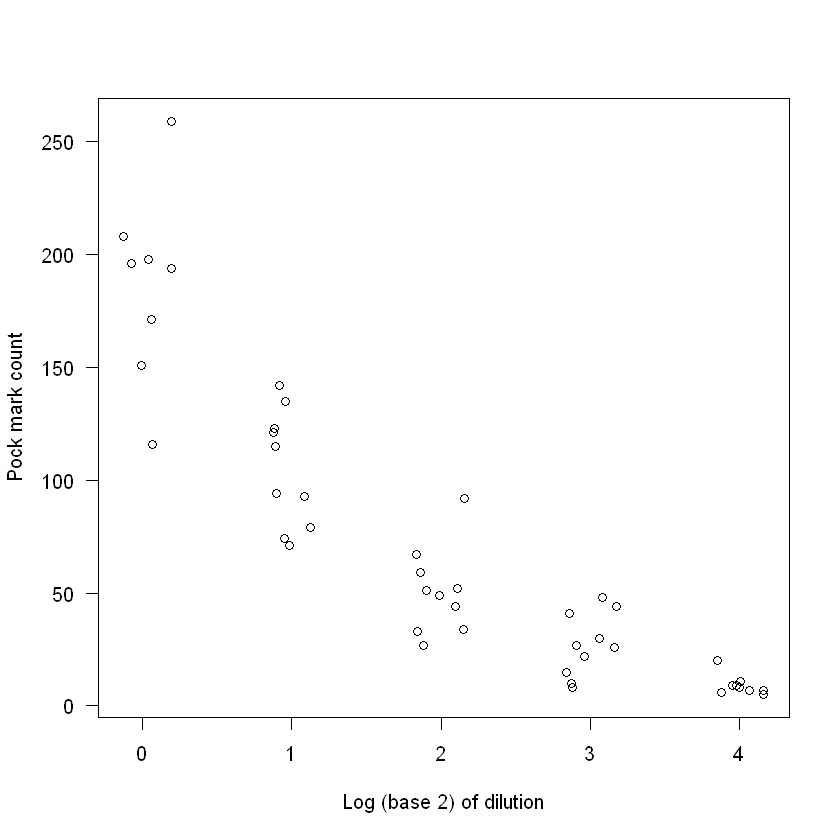

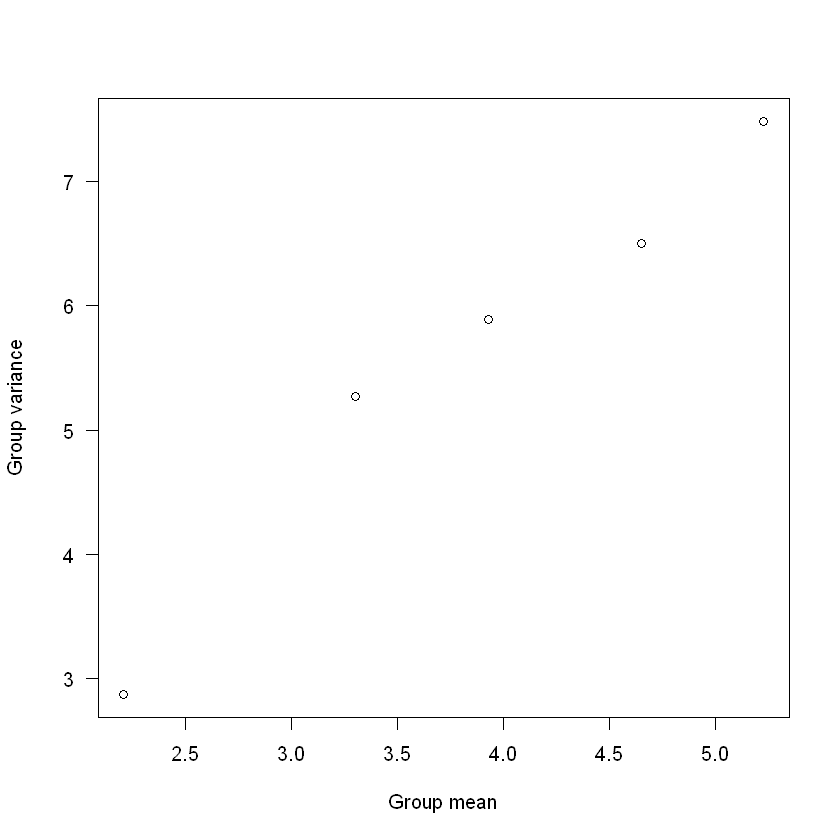

In [48]:
data(pock)
plot( Count ~ jitter(log2(Dilution)), data=pock, las=1,
xlab="Log (base 2) of dilution", ylab="Pock mark count")
mn <- with(pock, tapply(Count, log2(Dilution), mean) ) # Group means
vr <- with(pock, tapply(Count, log2(Dilution), var) ) # Group variances
plot( log(vr) ~ log(mn), las=1,
xlab="Group mean", ylab="Group variance")

In [49]:
coef(lm(log(vr)~log(mn)))

(Intercept)     log(mn) 
 0.02861162  1.44318666

In [50]:
m1 <- glm( Count ~ log2(Dilution), data=pock, family=poisson )
X2 <- sum(residuals(m1, type="pearson")^2)
c(Df=df.residual(m1), Resid.Dev=deviance(m1), Pearson.X2=X2)

Df  Resid.Dev Pearson.X2 
   46.0000   290.4387   291.5915

In [51]:
library(MASS)
m.nb <- glm.nb( Count ~ log2(Dilution), data=pock )
m.nb$theta

[1] 9.892894

In [52]:
m.nb <- glm.convert(m.nb)
printCoefmat(coef(summary(m.nb, dispersion=1)))

               Estimate Std. Error z value  Pr(>|z|)    
(Intercept)     5.33284    0.08786  60.697 < 2.2e-16 ***
log2(Dilution) -0.72460    0.03886 -18.646 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [53]:
m.qp <- glm( Count ~ log2(Dilution), data=pock, family="quasipoisson")

In [55]:
coef(summary(m.qp))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.2679317,0.05677867,92.78012,5.709222e-54
log2(Dilution),-0.6809442,0.03888257,-17.51284,5.627511e-22


In [54]:
se.m1 <- coef(summary(m1))[, "Std. Error"]
se.qp <- coef(summary(m.qp))[, "Std. Error"]
data.frame(SE.Pois=se.m1, SE.Quasi=se.qp, ratio=se.qp/se.m1)

,SE.Pois,SE.Quasi,ratio
(Intercept),0.02255150,0.05677867,2.517733
log2(Dilution),0.01544348,0.03888257,2.517733


In [59]:
sqrt(summary(m.qp)$dispersion)

[1] 2.517733

In [60]:
data(hcrabs); str(hcrabs)

'data.frame':	173 obs. of  5 variables:
 $ Col  : Factor w/ 4 levels "D","DM","LM",..: 4 2 3 2 2 4 3 2 4 2 ...
 $ Spine: Factor w/ 3 levels "BothOK","NoneOK",..: 2 2 1 2 2 2 1 3 1 2 ...
 $ Width: num  28.3 22.5 26 24.8 26 23.8 26.5 24.7 23.7 25.6 ...
 $ Sat  : int  8 0 9 0 4 0 0 0 0 0 ...
 $ Wt   : int  3050 1550 2300 2100 2600 2100 2350 1900 1950 2150 ...


In [61]:
hcrabs$Col <- ordered(hcrabs$Col, levels=c("LM", "M", "DM", "D"))

In [62]:
hcrabs$Spine <- ordered(hcrabs$Spine,
levels=c("NoneOK", "OneOK", "BothOK"))

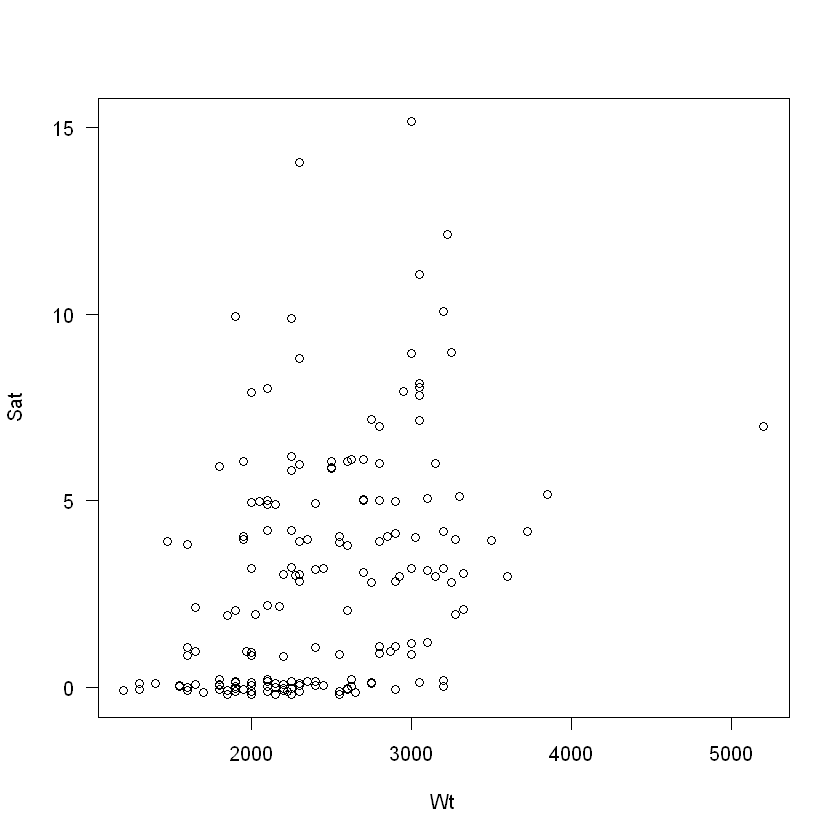

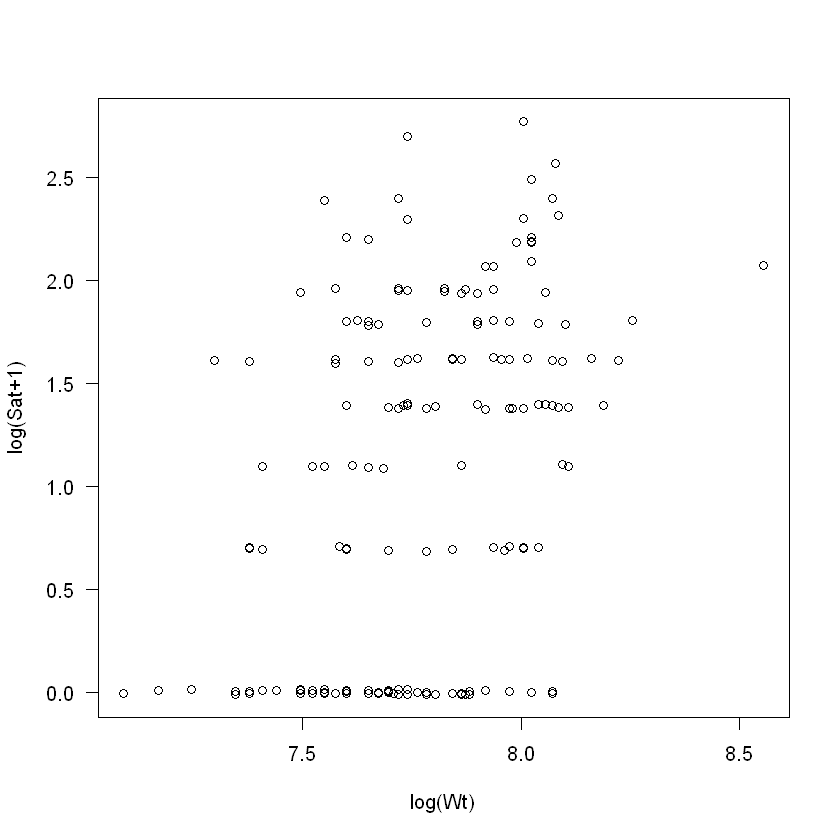

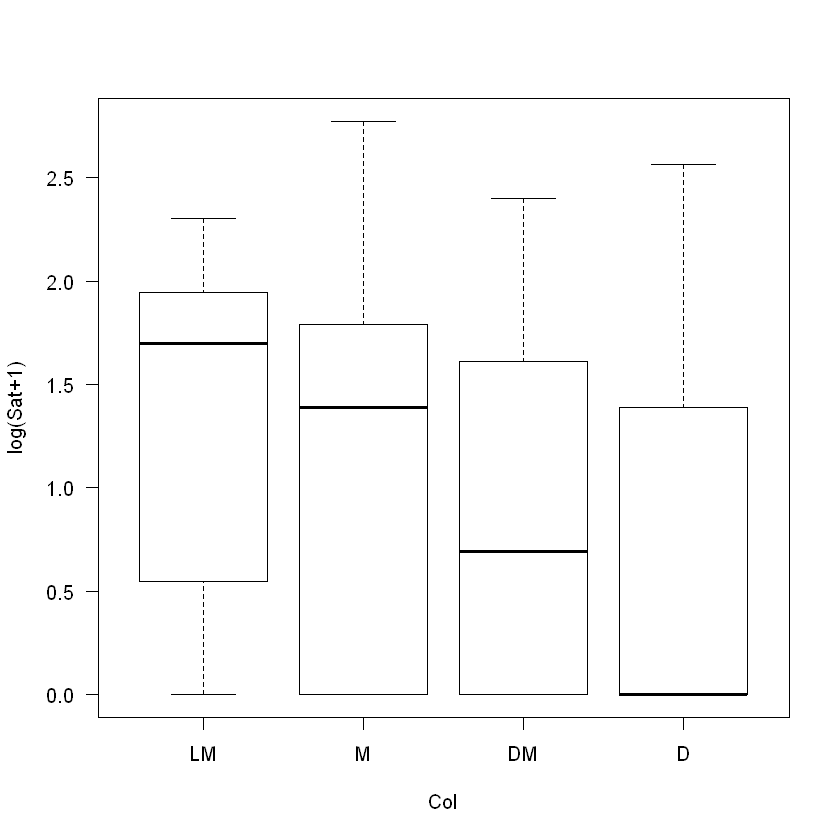

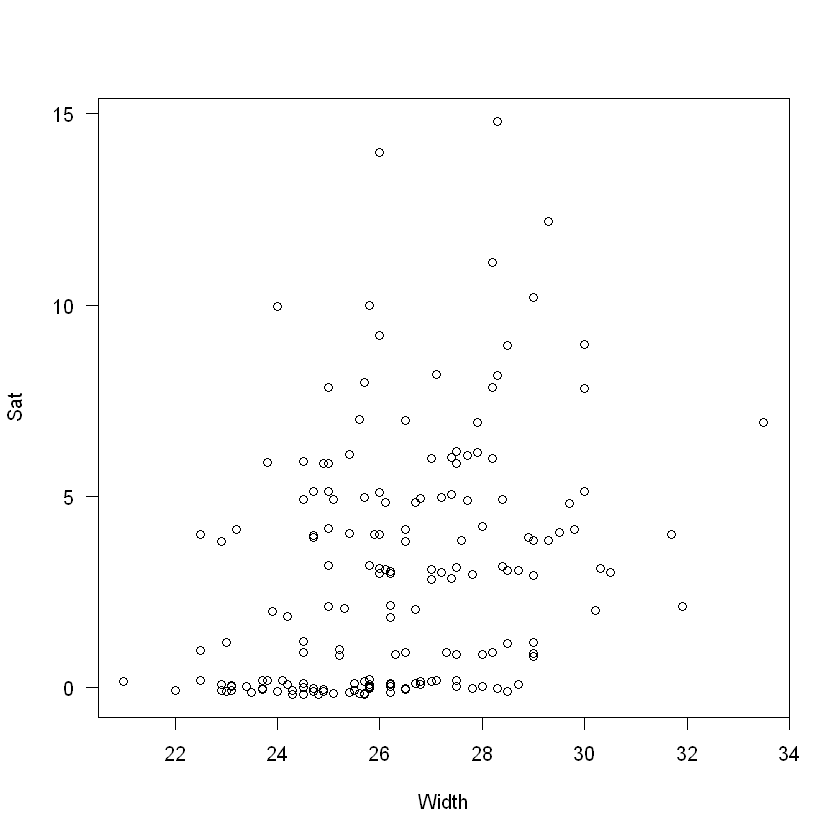

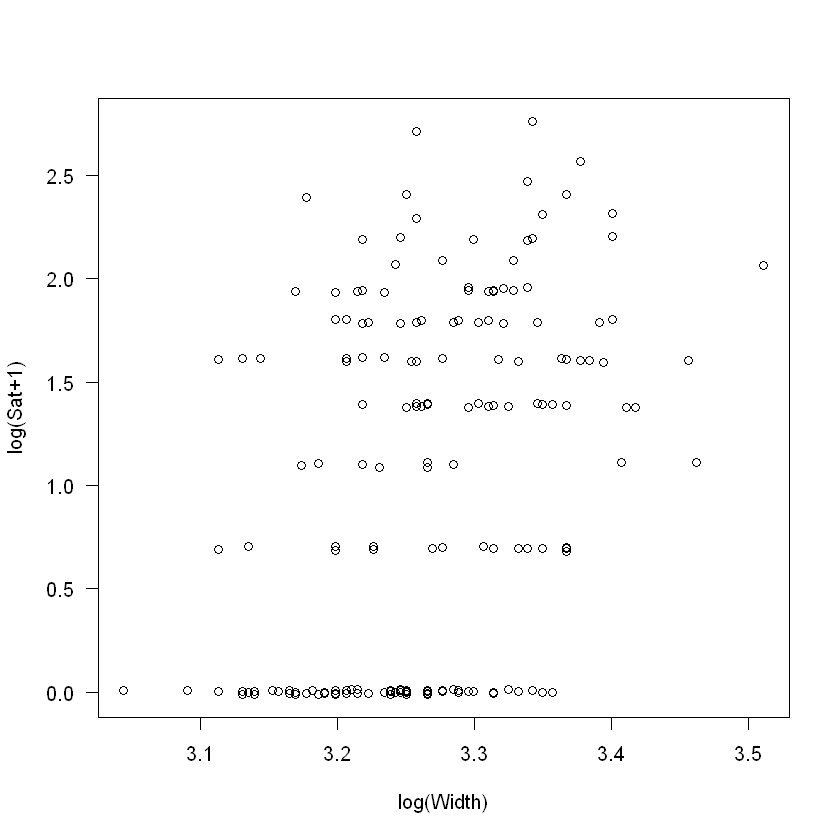

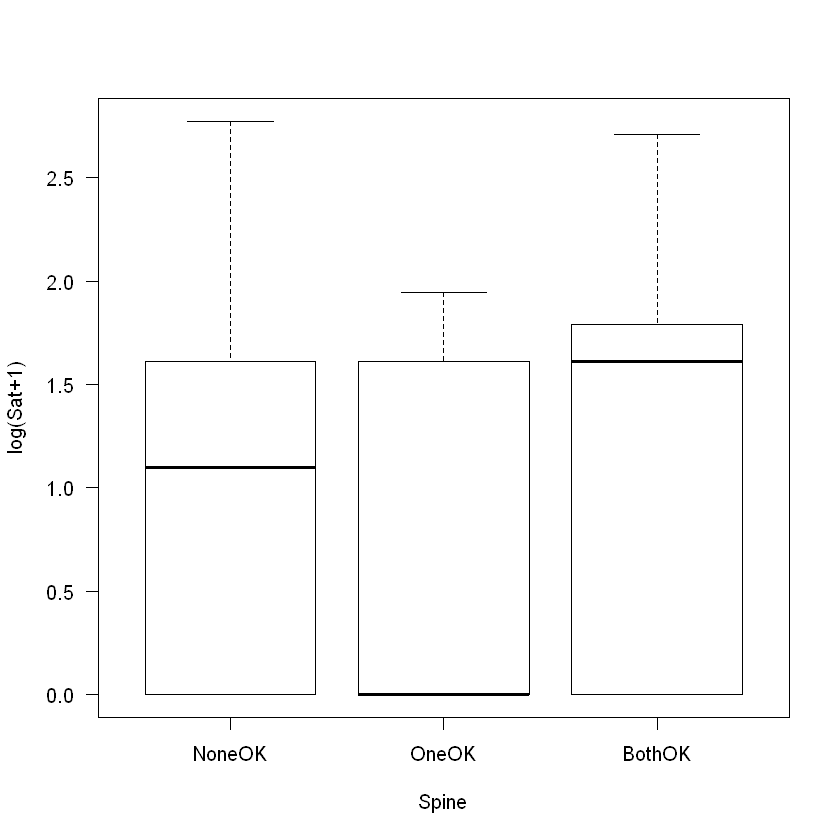

In [63]:
with(hcrabs,{
logSat <- log(Sat+1)
plot( jitter(Sat) ~ Wt, ylab="Sat", las=1)
plot( jitter(logSat) ~ log(Wt), ylab="log(Sat+1)", las=1)
plot( logSat ~ Col, ylab="log(Sat+1)", las=1)
plot( jitter(Sat) ~ Width, ylab="Sat", las=1)
plot( jitter(logSat) ~ log(Width), ylab="log(Sat+1)", las=1)
plot( logSat ~ Spine, ylab="log(Sat+1)", las=1)
})

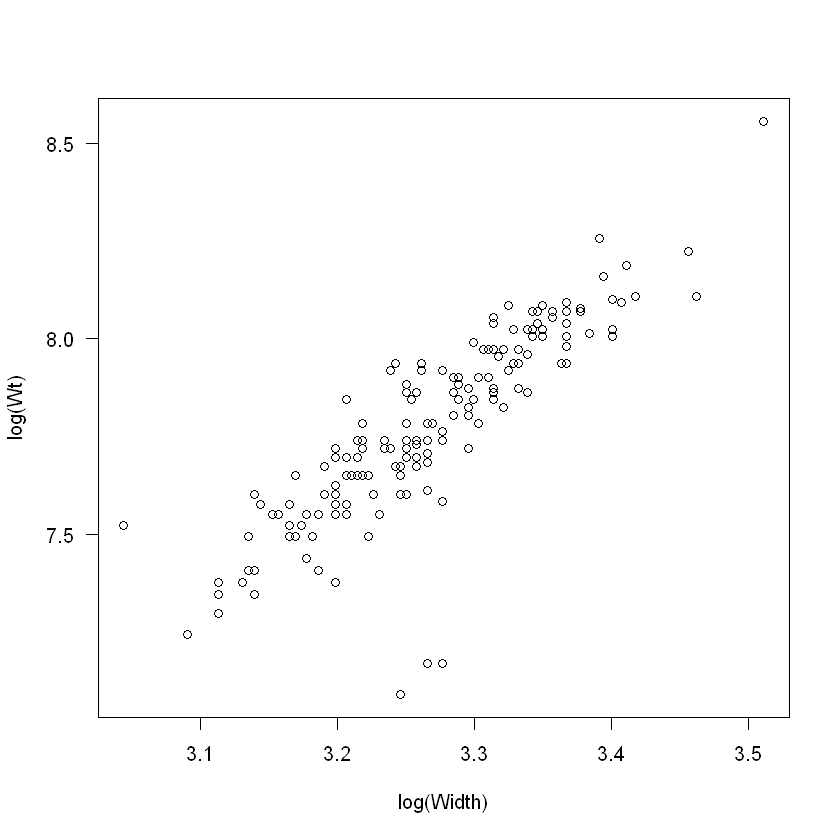

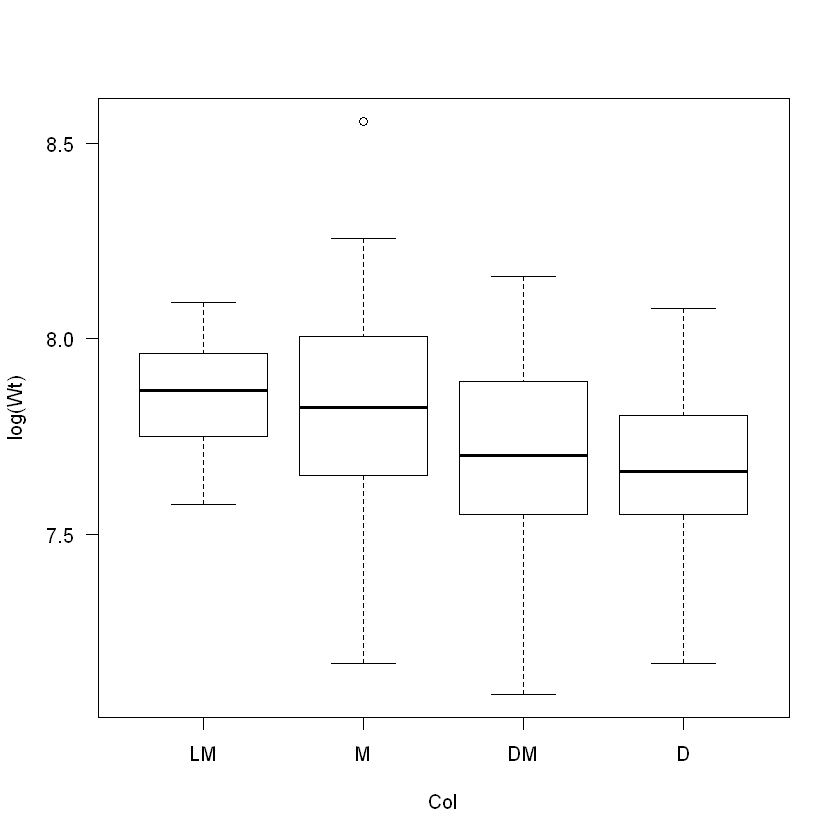

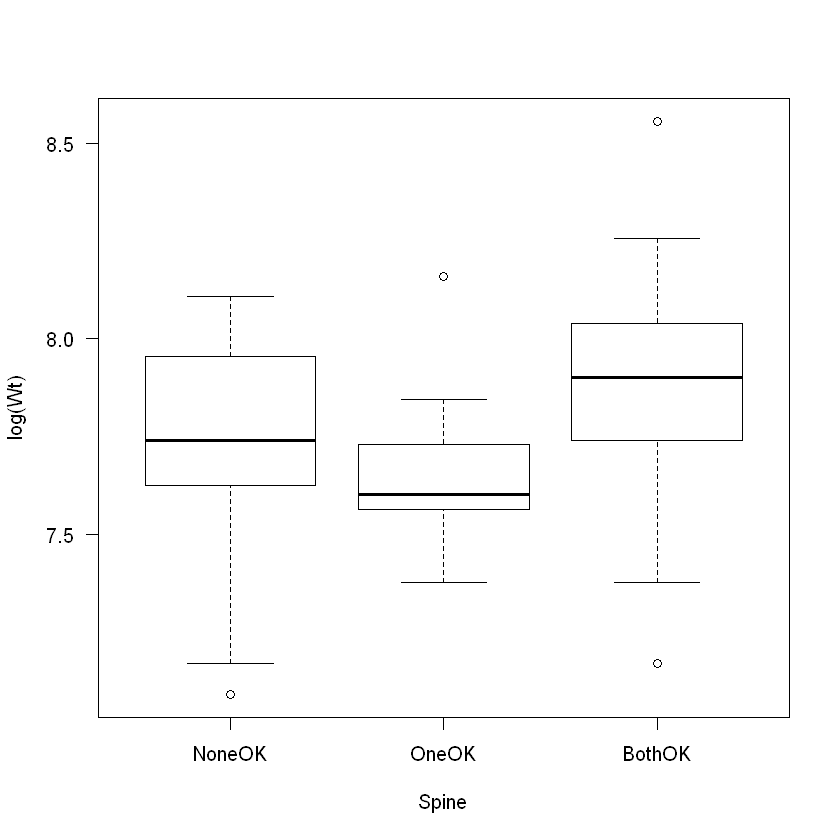

In [64]:
with(hcrabs,{
plot( log(Wt) ~ log(Width), las=1 )
plot( log(Wt) ~ Col, las=1 )
plot( log(Wt) ~ Spine, las=1 )
})

In [65]:
coef(lm( log(Wt) ~ log(Width), data=hcrabs ))

(Intercept)  log(Width) 
 -0.6004161   2.5629298

In [66]:
cr.m1 <- glm(Sat ~ log(Wt) + log(Width) + Spine + Col,
family=quasipoisson, data=hcrabs)

In [67]:
anova(cr.m1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,172,632.7917,NA,NA
log(Wt),1,83.083730337,171,549.7079,25.964483670,9.428851e-07
log(Width),1,0.007263961,170,549.7007,0.002270059,9.620567e-01
Spine,2,1.125142390,168,548.5755,0.175809037,8.389351e-01
Col,3,7.629511584,165,540.9460,0.794765827,4.984213e-01


In [68]:
deviance(cr.m1) / df.residual(cr.m1)
sum(cr.m1$weights * cr.m1$residuals^2) / df.residual(cr.m1)
sum(resid(cr.m1, type="pearson")^2) / df.residual(cr.m1)

[1] 3.278461

[1] 3.199899

[1] 3.199895

In [69]:
cr.m2 <- glm(Sat ~ log(Wt), family=quasipoisson, data=hcrabs)

In [74]:
deviance(cr.m2)
pchisq(deviance(cr.m2), df=df.residual(cr.m2), lower.tail = FALSE)

[1] 549.7079

[1] 2.574234e-41

In [70]:
printCoefmat(coef(summary(cr.m2)), digits=3)

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -12.568      2.664   -4.72  4.9e-06 ***
log(Wt)        1.744      0.339    5.15  7.0e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [72]:
x <- log(hcrabs$Wt); dev <- rep(NA, 100)
n <- length(hcrabs$Sat); mu <- fitted(cr.m2)
for (i in 1:100) {
y <- rpois(n, lambda=mu) # Generate random Poisson values
dev[i] <- glm(y~x, family=quasipoisson)$deviance
}
c(Mean.Dev=mean(dev), Std.Dev=sd(dev))

Mean.Dev   Std.Dev 
188.24153  20.03024

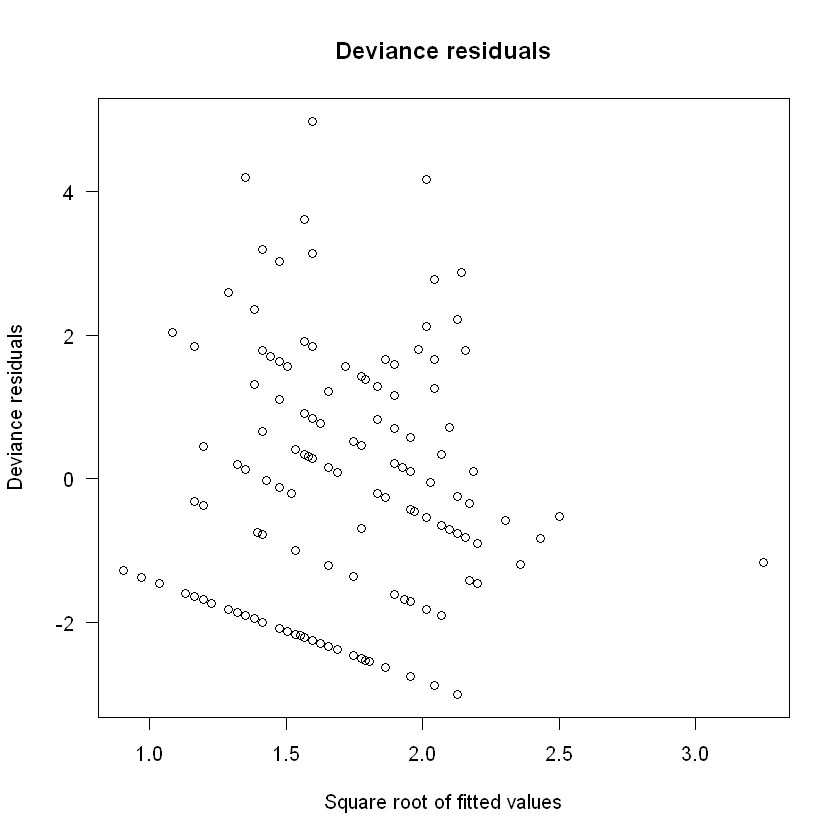

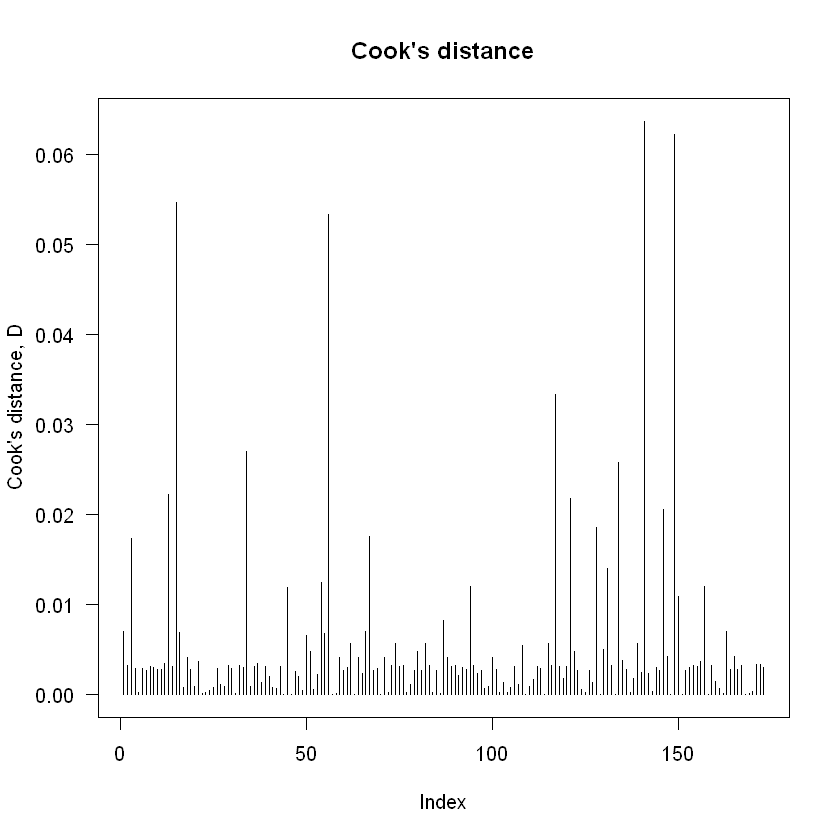

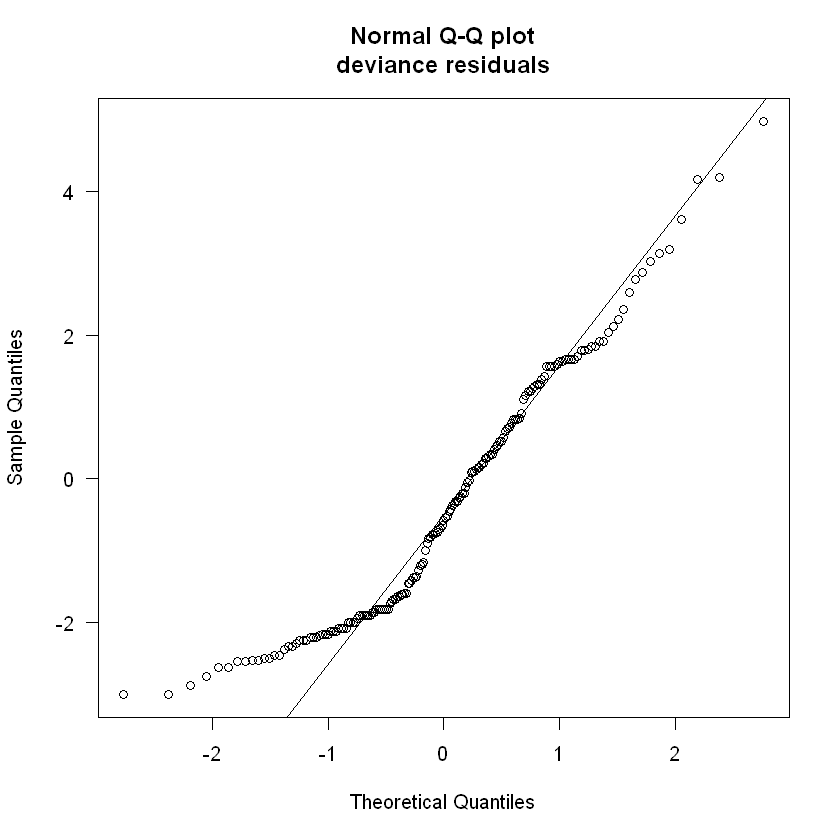

In [75]:
plot( resid(cr.m2) ~ sqrt(fitted(cr.m2)), las=1,
main="Deviance residuals", ylab="Deviance residuals",
xlab="Square root of fitted values" )
plot( cooks.distance(cr.m2), type="h", las=1,
ylab="Cook's distance, D", main="Cook's distance")
qqnorm( resid(cr.m2), las=1,
main="Normal Q-Q plot\ndeviance residuals")
qqline( resid(cr.m2))

In [76]:
colSums( influence.measures(cr.m2)$is.inf )

dfb.1_ dfb.l(W)    dffit    cov.r   cook.d      hat 
       0        0        1        8        0        3

In [79]:
cr.nb <- glm.nb(Sat ~ log(Wt), data=hcrabs)
cr.nb <- glm.convert(cr.nb)
anova(cr.nb, dispersion=1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,172,219.8090,NA
log(Wt),1,23.33911,171,196.4698,1.358102e-06


In [80]:
printCoefmat(coef(summary(cr.nb, dispersion=1)))

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -14.55581    3.10909 -4.6817 2.845e-06 ***
log(Wt)       1.99862    0.39839  5.0168 5.254e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [81]:
cr.nb$theta

[1] 0.9580286

In [82]:
colSums( influence.measures(cr.nb)$is.inf )

dfb.1_ dfb.l(W)    dffit    cov.r   cook.d      hat 
       0        0        0        6        0        3

In [83]:
newW <- seq( min(hcrabs$Wt), max(hcrabs$Wt), length=100)
newS.qp <- predict(cr.m2, newdata=data.frame(Wt=newW), se.fit=TRUE)
newS.nb <- predict(cr.nb, newdata=data.frame(Wt=newW), se.fit=TRUE,
dispersion=1)
tstar <- qt(0.975, df=df.residual(cr.m2) ) # For a 95% CI
ME.qp <- tstar * newS.qp$se.fit; ME.nb <- tstar * newS.nb$se.fit
mu.qp <- newS.qp$fit; mu.nb <- newS.nb$fit

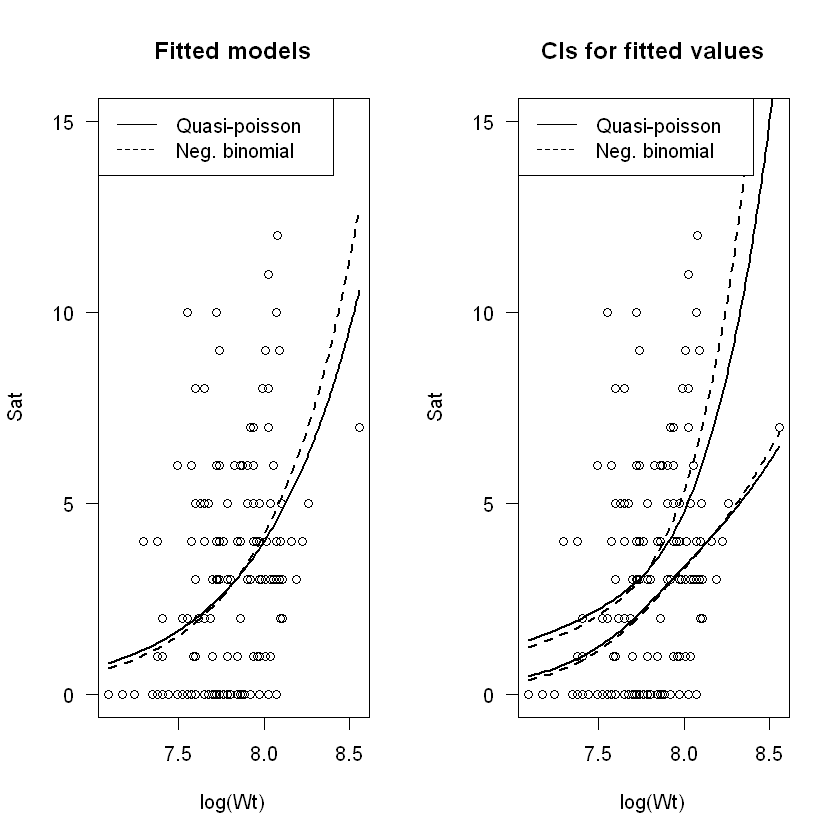

In [84]:
par( mfrow=c(1, 2))
plot( Sat~log(Wt), data=hcrabs, las=1, main="Fitted models")
lines( exp(mu.qp) ~ log(newW), lwd=2 )
lines( exp(mu.nb) ~ log(newW), lwd=2, lty=2 );
legend("topleft", lty=1:2, legend=c("Quasi-poisson", "Neg. binomial") )
#
plot( Sat~log(Wt), data=hcrabs, las=1, main="CIs for fitted values")
ci.lo <- exp(mu.qp - ME.qp); ci.hi <- exp(mu.qp + ME.qp)
lines( ci.lo ~ log(newW), lwd=2); lines( ci.hi ~ log(newW), lwd=2)
ci.lo <- exp(mu.nb - ME.nb); ci.hi <- exp(mu.nb + ME.nb)
lines( ci.lo ~ log(newW), lwd=2, lty=2)
lines( ci.hi ~ log(newW), lwd=2, lty=2)
legend("topleft", lty=1:2, legend=c("Quasi-poisson", "Neg. binomial") )